# 梯度下降法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plot_x = np.linspace(-1,6,150)
plot_y = (plot_x - 2.5)**2 - 1
plt.plot(plot_x,plot_y)
plt.show()

In [2]:
def J(theta):
    return (theta-2.5)**2 - 1


def dJ(theta):
    return 2*theta-5
# 设置初始theta=0,用梯度下降法，寻求函数的最小值

theta = 0
epsilon = 1e-8 #停止迭代的误差
eta = 0.1 #步长
while True:
    last_theta = theta
    theta = theta - eta*dJ(theta)
    if np.abs(J(theta) - J(last_theta))<epsilon:
        break

J(theta)

-0.99999998814289

In [3]:
theta

2.499891109642585

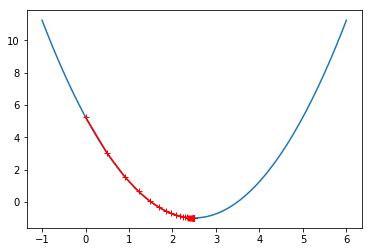

In [4]:
# 由我们基本数学知识可知，寻找到的基本接近函数的最小值
# 把每次的迭代路径可视化
theta = 0
theta_history = [theta]
epsilon = 1e-8 #停止迭代的误差
eta = 0.1 #步长
while True:
    last_theta = theta
    theta = theta - eta*dJ(theta)
    theta_history.append(theta)
    if np.abs(J(theta) - J(last_theta))<epsilon:
        break
    

plt.plot(plot_x,J(plot_x))
plt.plot(np.array(theta_history),J(np.array(theta_history)),color = 'r',marker = '+')
plt.show()


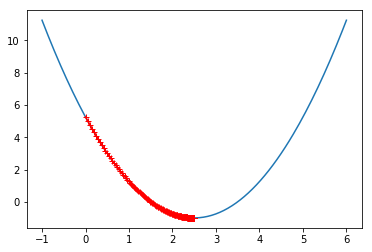

In [5]:
# 对算法进行封装
def gradient_descent(theta = 0,epsilon = 1e-8,eta = 0.1):
    theta_history = [theta]
    while True:
        last_theta = theta
        theta = theta - eta*dJ(theta)
        theta_history.append(theta)
        if np.abs(J(theta) - J(last_theta))<epsilon:
            break
        
    return theta_history
def plot_theta_history(plot_x,theta_history):
    plt.plot(plot_x,J(plot_x))
    plt.plot(np.array(theta_history),J(np.array(theta_history)),color = 'r',marker = '+')
    plt.show()

# 改变eta的大小，找到一个最优的eta，既可以达到最小值，又使迭代次数最小
theta_history = gradient_descent(eta = 0.01)
plot_theta_history(plot_x,theta_history)

In [6]:
# 可以看到，迭代的次数更多了
len(theta_history)

424

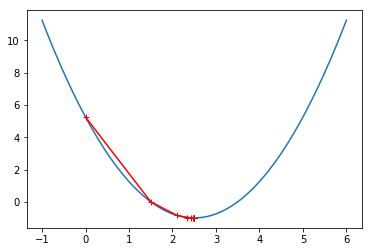

In [7]:
#增大 步长eta
theta_history = gradient_descent(eta = 0.3)
plot_theta_history(plot_x,theta_history)

In [8]:
len(theta_history)

13

In [9]:
J(theta_history[-1])

-0.9999999982407813

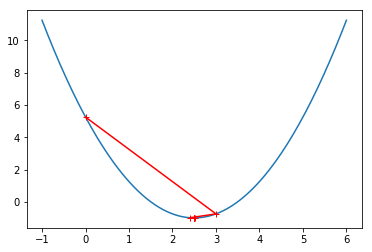

In [10]:
#继续增大 步长eta
theta_history = gradient_descent(eta = 0.6)
plot_theta_history(plot_x,theta_history)

In [11]:
len(theta_history)

9

In [12]:
J(theta_history[-1])

-0.99999999995904

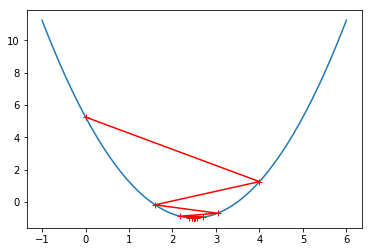

In [13]:
# 虽然第一次跳过最优点，但是随后又反弹，最后仍能到达最优点
#继续增大
#继续增大 步长eta
theta_history = gradient_descent(eta = 0.8)
plot_theta_history(plot_x,theta_history)

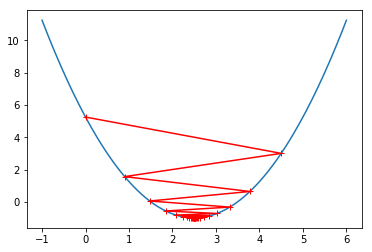

In [14]:
#继续增大 步长eta
theta_history = gradient_descent(eta = 0.9)
plot_theta_history(plot_x,theta_history)

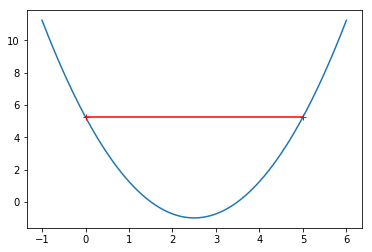

In [15]:
#继续增大 步长eta
theta_history = gradient_descent(eta = 1.0)
plot_theta_history(plot_x,theta_history)

In [16]:
len(theta_history)

2

In [17]:
theta = 0
eta = 1
last_theta = theta
theta = theta - eta*dJ(theta)
J(last_theta) - J(theta)

0.0

In [18]:
# 由上可知，theta = 0,经过过一次迭代，theta = 5,
#J（theta = 0）== j(theta = 5), 故跳出循环
# 再增大eta 会是什么情况呢
theta_history = gradient_descent(eta = 1.1)
plot_theta_history(plot_x,theta_history)

OverflowError: (34, 'Numerical result out of range')

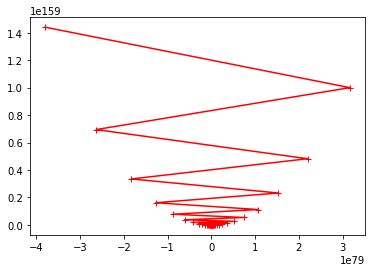

In [20]:
# # 报错，Numerical result out of range，说明我们的步长取的太大，导致最后不会收敛
# 在def J(theta)加一个try语句;
#增加迭代次数 iters = 1e6

def J(theta):
    try:
        return (theta-2.5)**2 - 1
    except:
        return float('inf')
    
def gradient_descent(theta = 0,epsilon = 1e-8,eta = 0.1,iters = 1e3):
    theta_history = [theta]
    i_iters = 0
    while i_iters < iters:
        i_iters +=1
        last_theta = theta
        theta = theta - eta*dJ(theta)
        theta_history.append(theta)
        if np.abs(J(theta) - J(last_theta))<epsilon:
            break
        
    return theta_history

theta_history = gradient_descent(eta = 1.1)
plot_theta_history(plot_x,theta_history)

In [21]:
# 步长太大，最终完全跑飞
len(theta_history)

1001

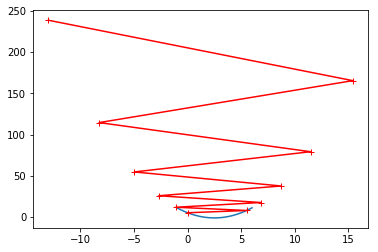

In [22]:
theta_history = gradient_descent(eta = 1.1,iters = 10)
plot_theta_history(plot_x,theta_history)